<a href="https://colab.research.google.com/github/OrleneJane/Sentiment-Analysis-and-Text-Mining/blob/main/Assignment_4_Predicting_House_Prices_Using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Load and Explore the Dataset (EDA)

I started by loading the Boston Housing dataset using Python libraries such as pandas, matplotlib, and seaborn. I checked the structure of the dataset and confirmed that it contains 506 rows and 14 columns. Fortunately, there were no missing values, so the dataset was clean and ready for analysis.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(url)

# Basic info
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695   

Step 2: Exploratory Data Analysis (EDA)

To understand relationships between variables, I generated a correlation heatmap and pairplots. I observed that the RM (average number of rooms) had a strong positive correlation with house prices (MEDV), while LSTAT (% lower status population) had a strong negative correlation. This guided my decision on which features to use in the regression models.



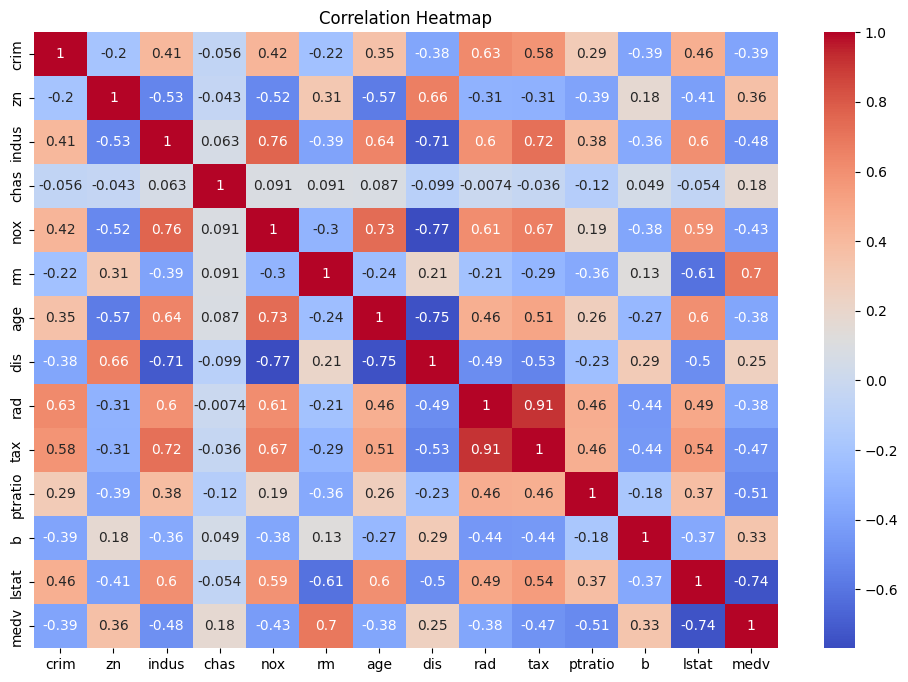

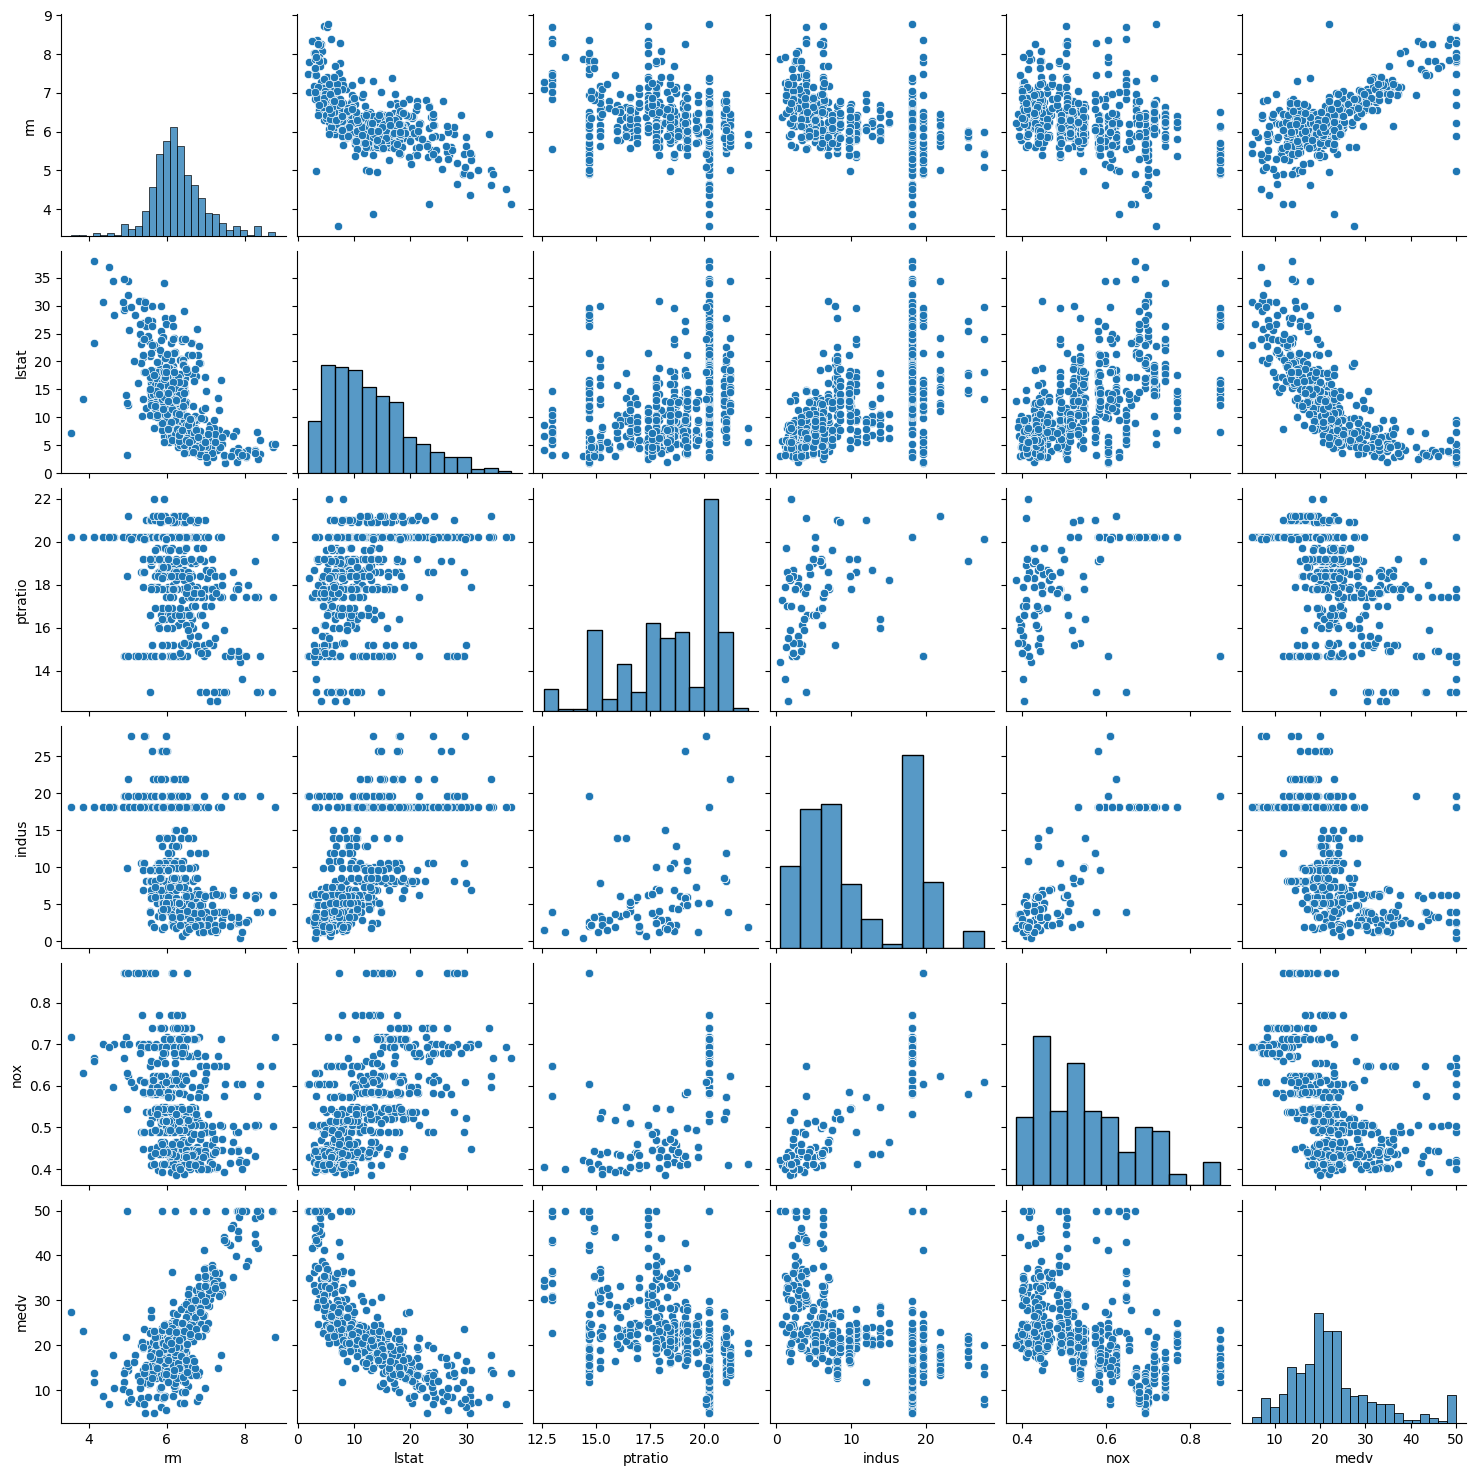

In [4]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Pairplot for selected features
sns.pairplot(data[['rm', 'lstat', 'ptratio', 'indus', 'nox', 'medv']])
plt.show()

Step 3: Simple Linear Regression Using RM

In this step, I built a simple linear regression model using RM (average number of rooms) as the only predictor to estimate MEDV. After training the model and testing it on unseen data, I evaluated its performance using metrics like R², MAE, and RMSE. The R² score of approximately 0.49 indicated that this single feature explained about 49% of the variation in house prices, showing that room count is a valuable but limited predictor.



In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Feature and target
X = data[['rm']]
y = data['medv']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model_simple = LinearRegression()
model_simple.fit(X_train, y_train)

# Prediction
y_pred_simple = model_simple.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred_simple)
mae = mean_absolute_error(y_test, y_pred_simple)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_simple))

print(f"Simple Linear Regression (RM): R² = {r2:.2f}, MAE = {mae:.2f}, RMSE = {rmse:.2f}")

Simple Linear Regression (RM): R² = 0.37, MAE = 4.48, RMSE = 6.79


Step 4: Multiple Linear Regression Using Top 5 Features

Next, I improved the model by using the top 5 features most correlated with MEDV: LSTAT, RM, PTRATIO, INDUS, and NOX. I trained a multiple linear regression model and observed better results compared to the simple model. The R² score increased significantly, meaning the model explained more of the variance in housing prices. This demonstrated the value of combining multiple relevant features to make more accurate predictions.

In [8]:
# Top 5 correlated features with MEDV
correlation = data.corr()['medv'].abs().sort_values(ascending=False)
top_features = correlation.index[1:6].tolist()  # Exclude MEDV itself

# Prepare data
X_multi = data[top_features]
y_multi = data['medv']

# Split
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Model
model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train_multi)

# Prediction
y_pred_multi = model_multi.predict(X_test_multi)

# Evaluation
r2_multi = r2_score(y_test_multi, y_pred_multi)
mae_multi = mean_absolute_error(y_test_multi, y_pred_multi)
rmse_multi = np.sqrt(mean_squared_error(y_test_multi, y_pred_multi))

print(f"Multiple Linear Regression: R² = {r2_multi:.2f}, MAE = {mae_multi:.2f}, RMSE = {rmse_multi:.2f}")

Multiple Linear Regression: R² = 0.62, MAE = 3.34, RMSE = 5.28


Step 5: Plot Predicted vs Actual and Residuals

To further assess the performance of the multiple regression model, I plotted the predicted values against the actual values. The points clustered closely around the diagonal line, showing a strong match between predictions and true values. I also plotted the residuals to check for patterns in prediction errors. The residuals appeared randomly distributed, which suggests the model is reasonably well-fitted and does not suffer from major biases or missing trends.

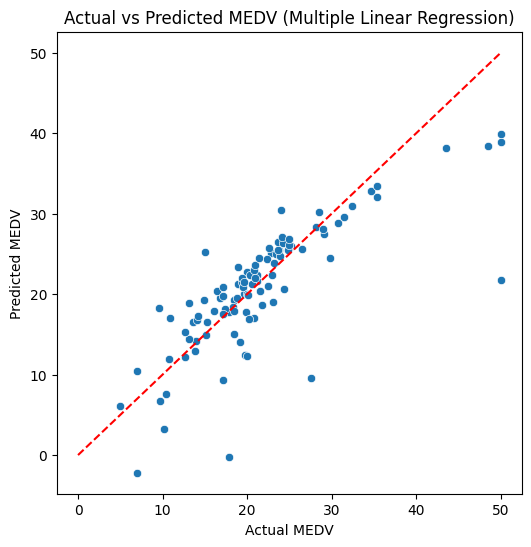

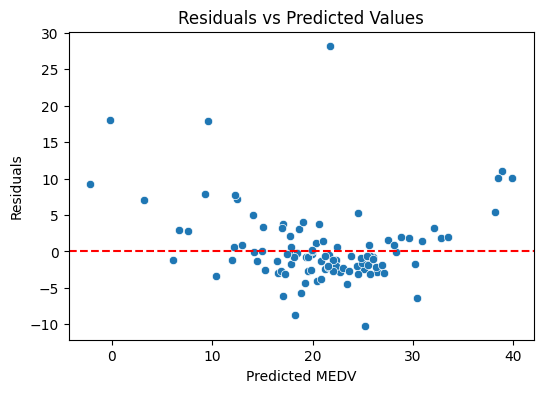

In [9]:
# Predicted vs Actual
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_multi, y=y_pred_multi)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted MEDV (Multiple Linear Regression)")
plt.plot([0, 50], [0, 50], '--r')
plt.show()

# Residual plot
residuals = y_test_multi - y_pred_multi
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred_multi, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()
